#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

In [1]:
!nvidia-smi

Mon Oct  7 20:38:18 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             12W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.0/883.0 kB 16.1 MB/s eta 0:00:00a 0:00:01


**Step 02 # Import All the Requried Libraries**

In [3]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Z4dN3gIkzs0lcKpz99ax")
project = rf.workspace("betelgues").project("venom-vzuvr")
version = project.version(1)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 2.0 MB/s eta 0:00:00a 0:00:01
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Venom-1 in yolov11:: 100%|██████████| 13396/13396 [00:01<00:00, 7096.81it/s]


In [6]:
dataset.location

'/kaggle/working/Venom-1'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [7]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=80 imgsz=640

100%|██████████████████████████████████████| 5.35M/5.35M [00:00<00:00, 66.1MB/s]
Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/Venom-1/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fals

**Step # 05 Examine Training Results**

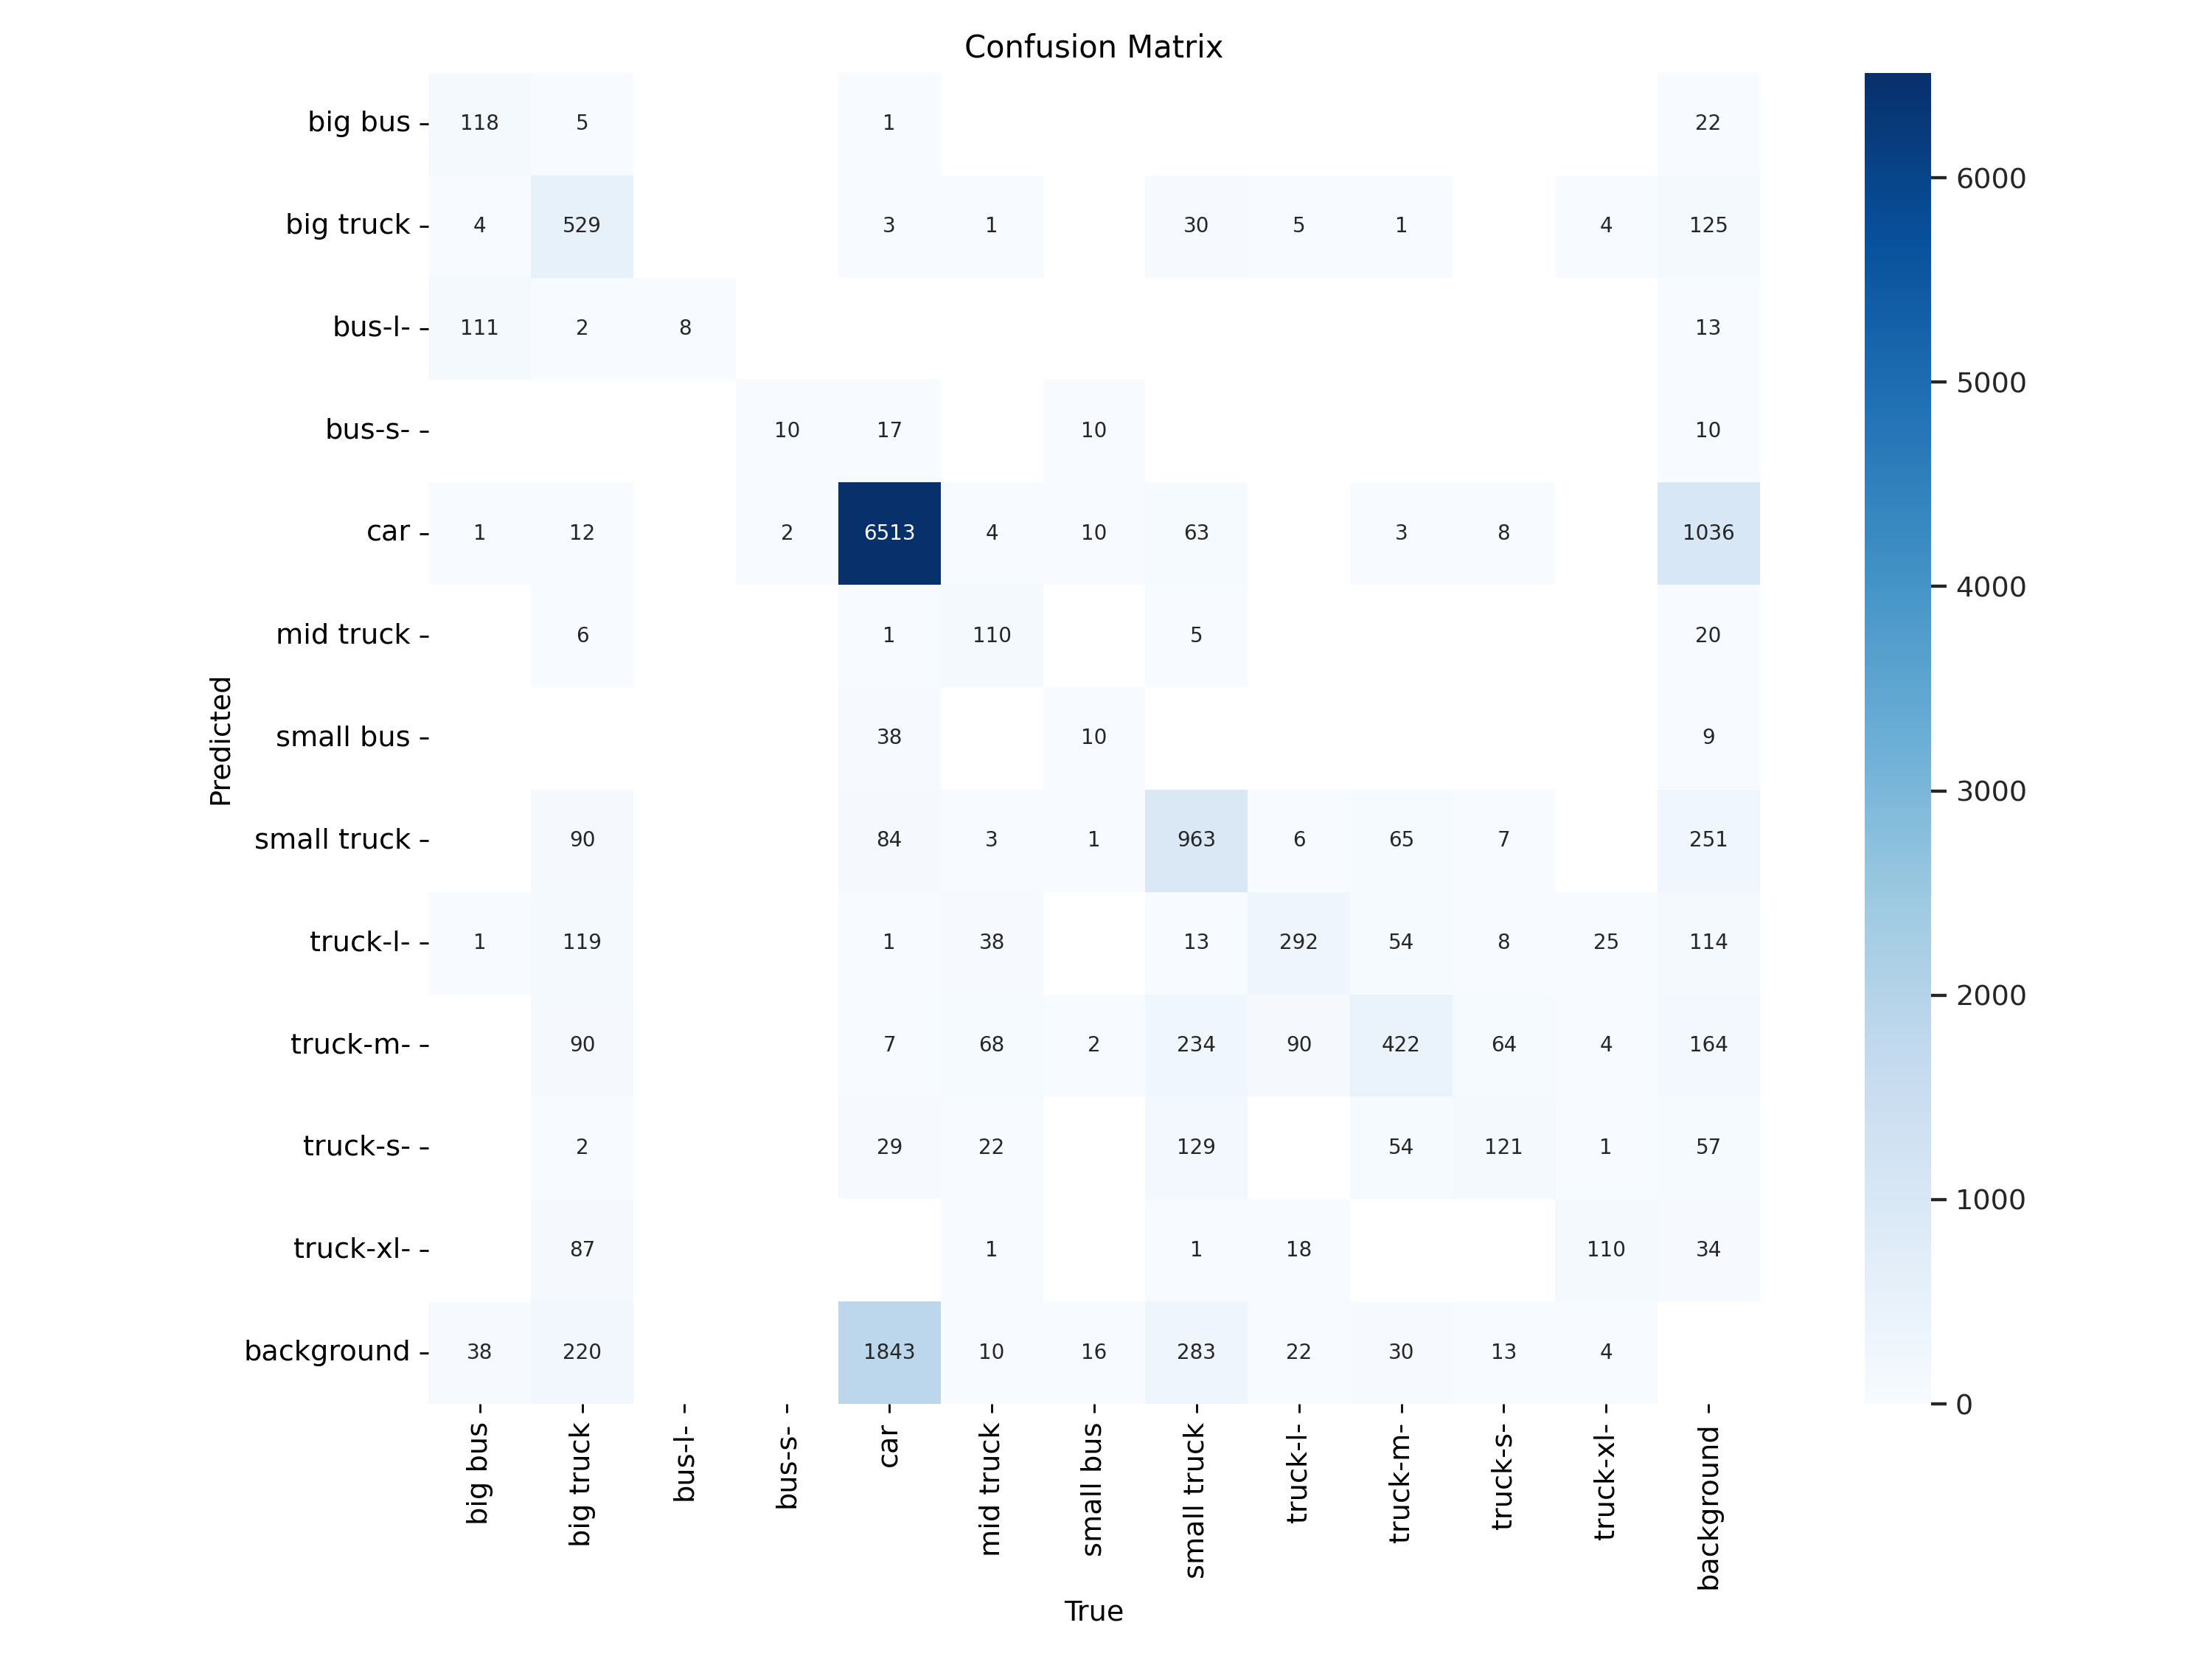

In [8]:
Image("/kaggle/working/runs/detect/train/confusion_matrix.png", width=600)

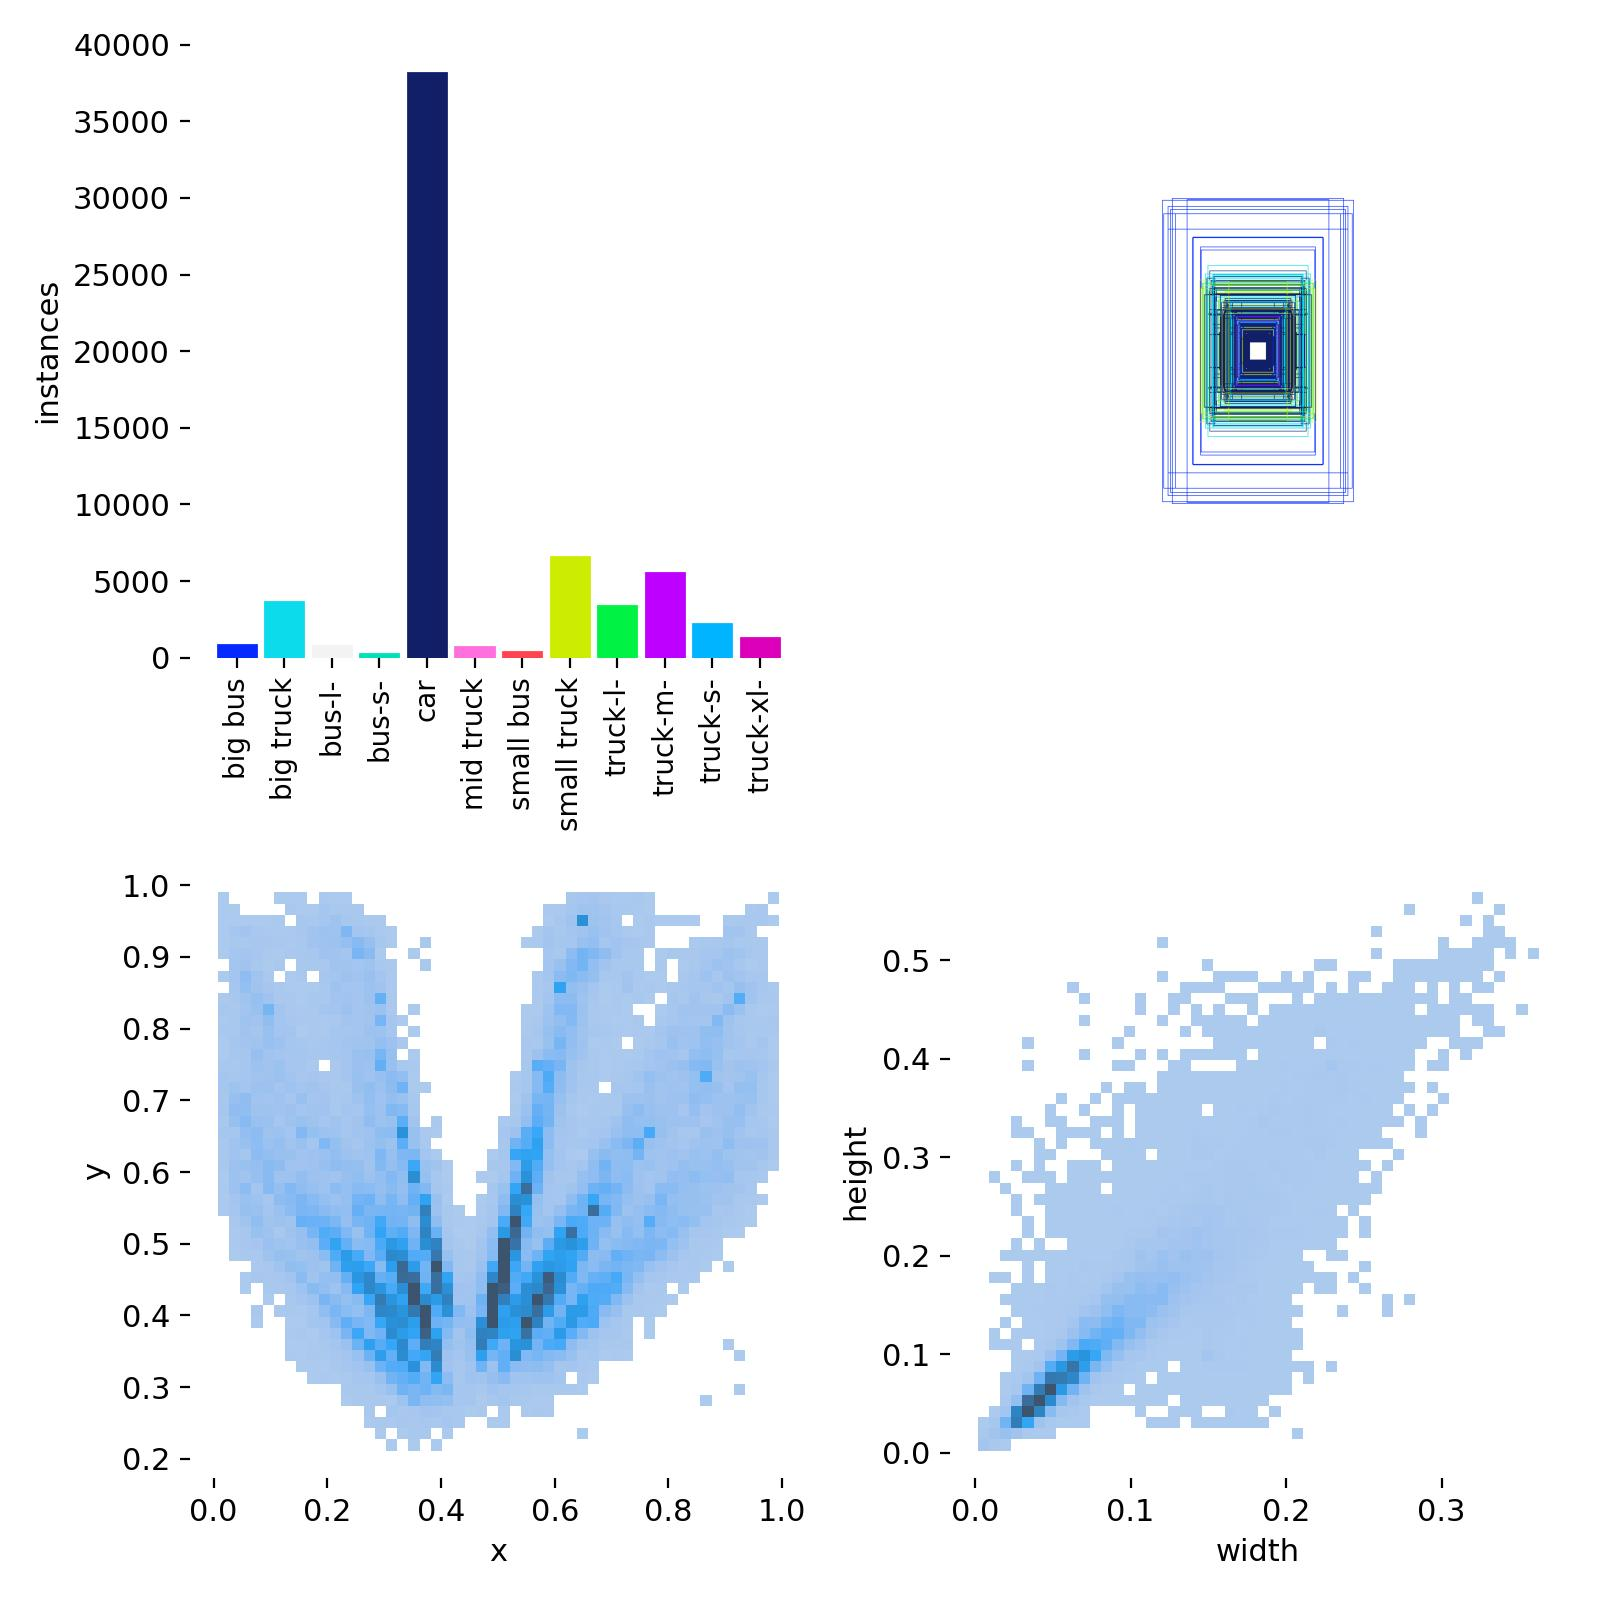

In [10]:
Image("/kaggle/working/runs/detect/train/labels.jpg", width=600)

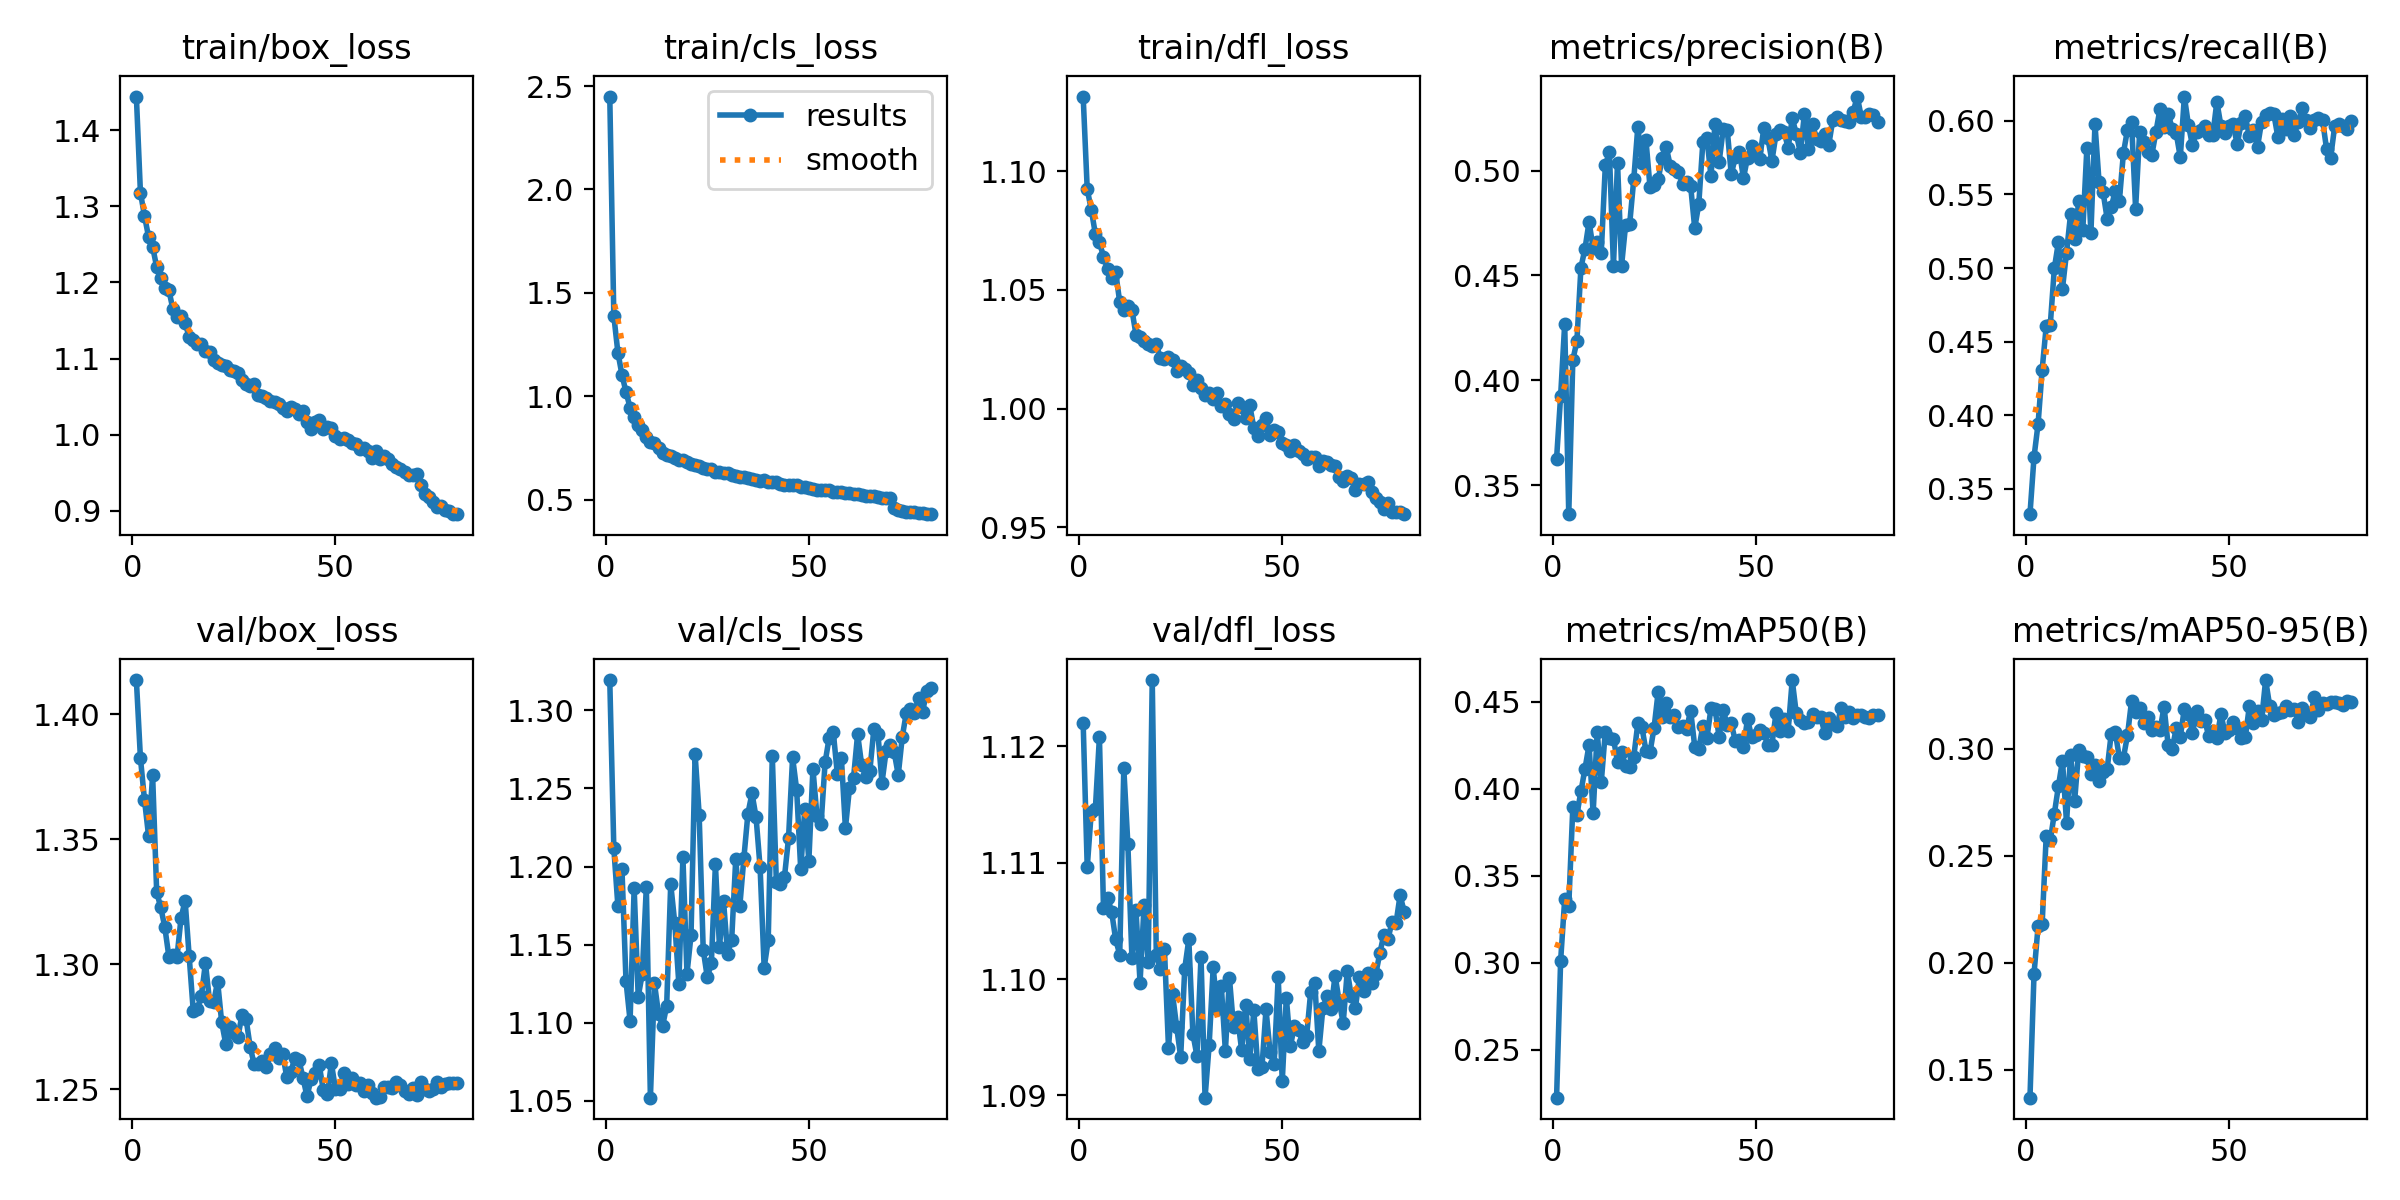

In [11]:
Image("/kaggle/working/runs/detect/train/results.png", width=600)

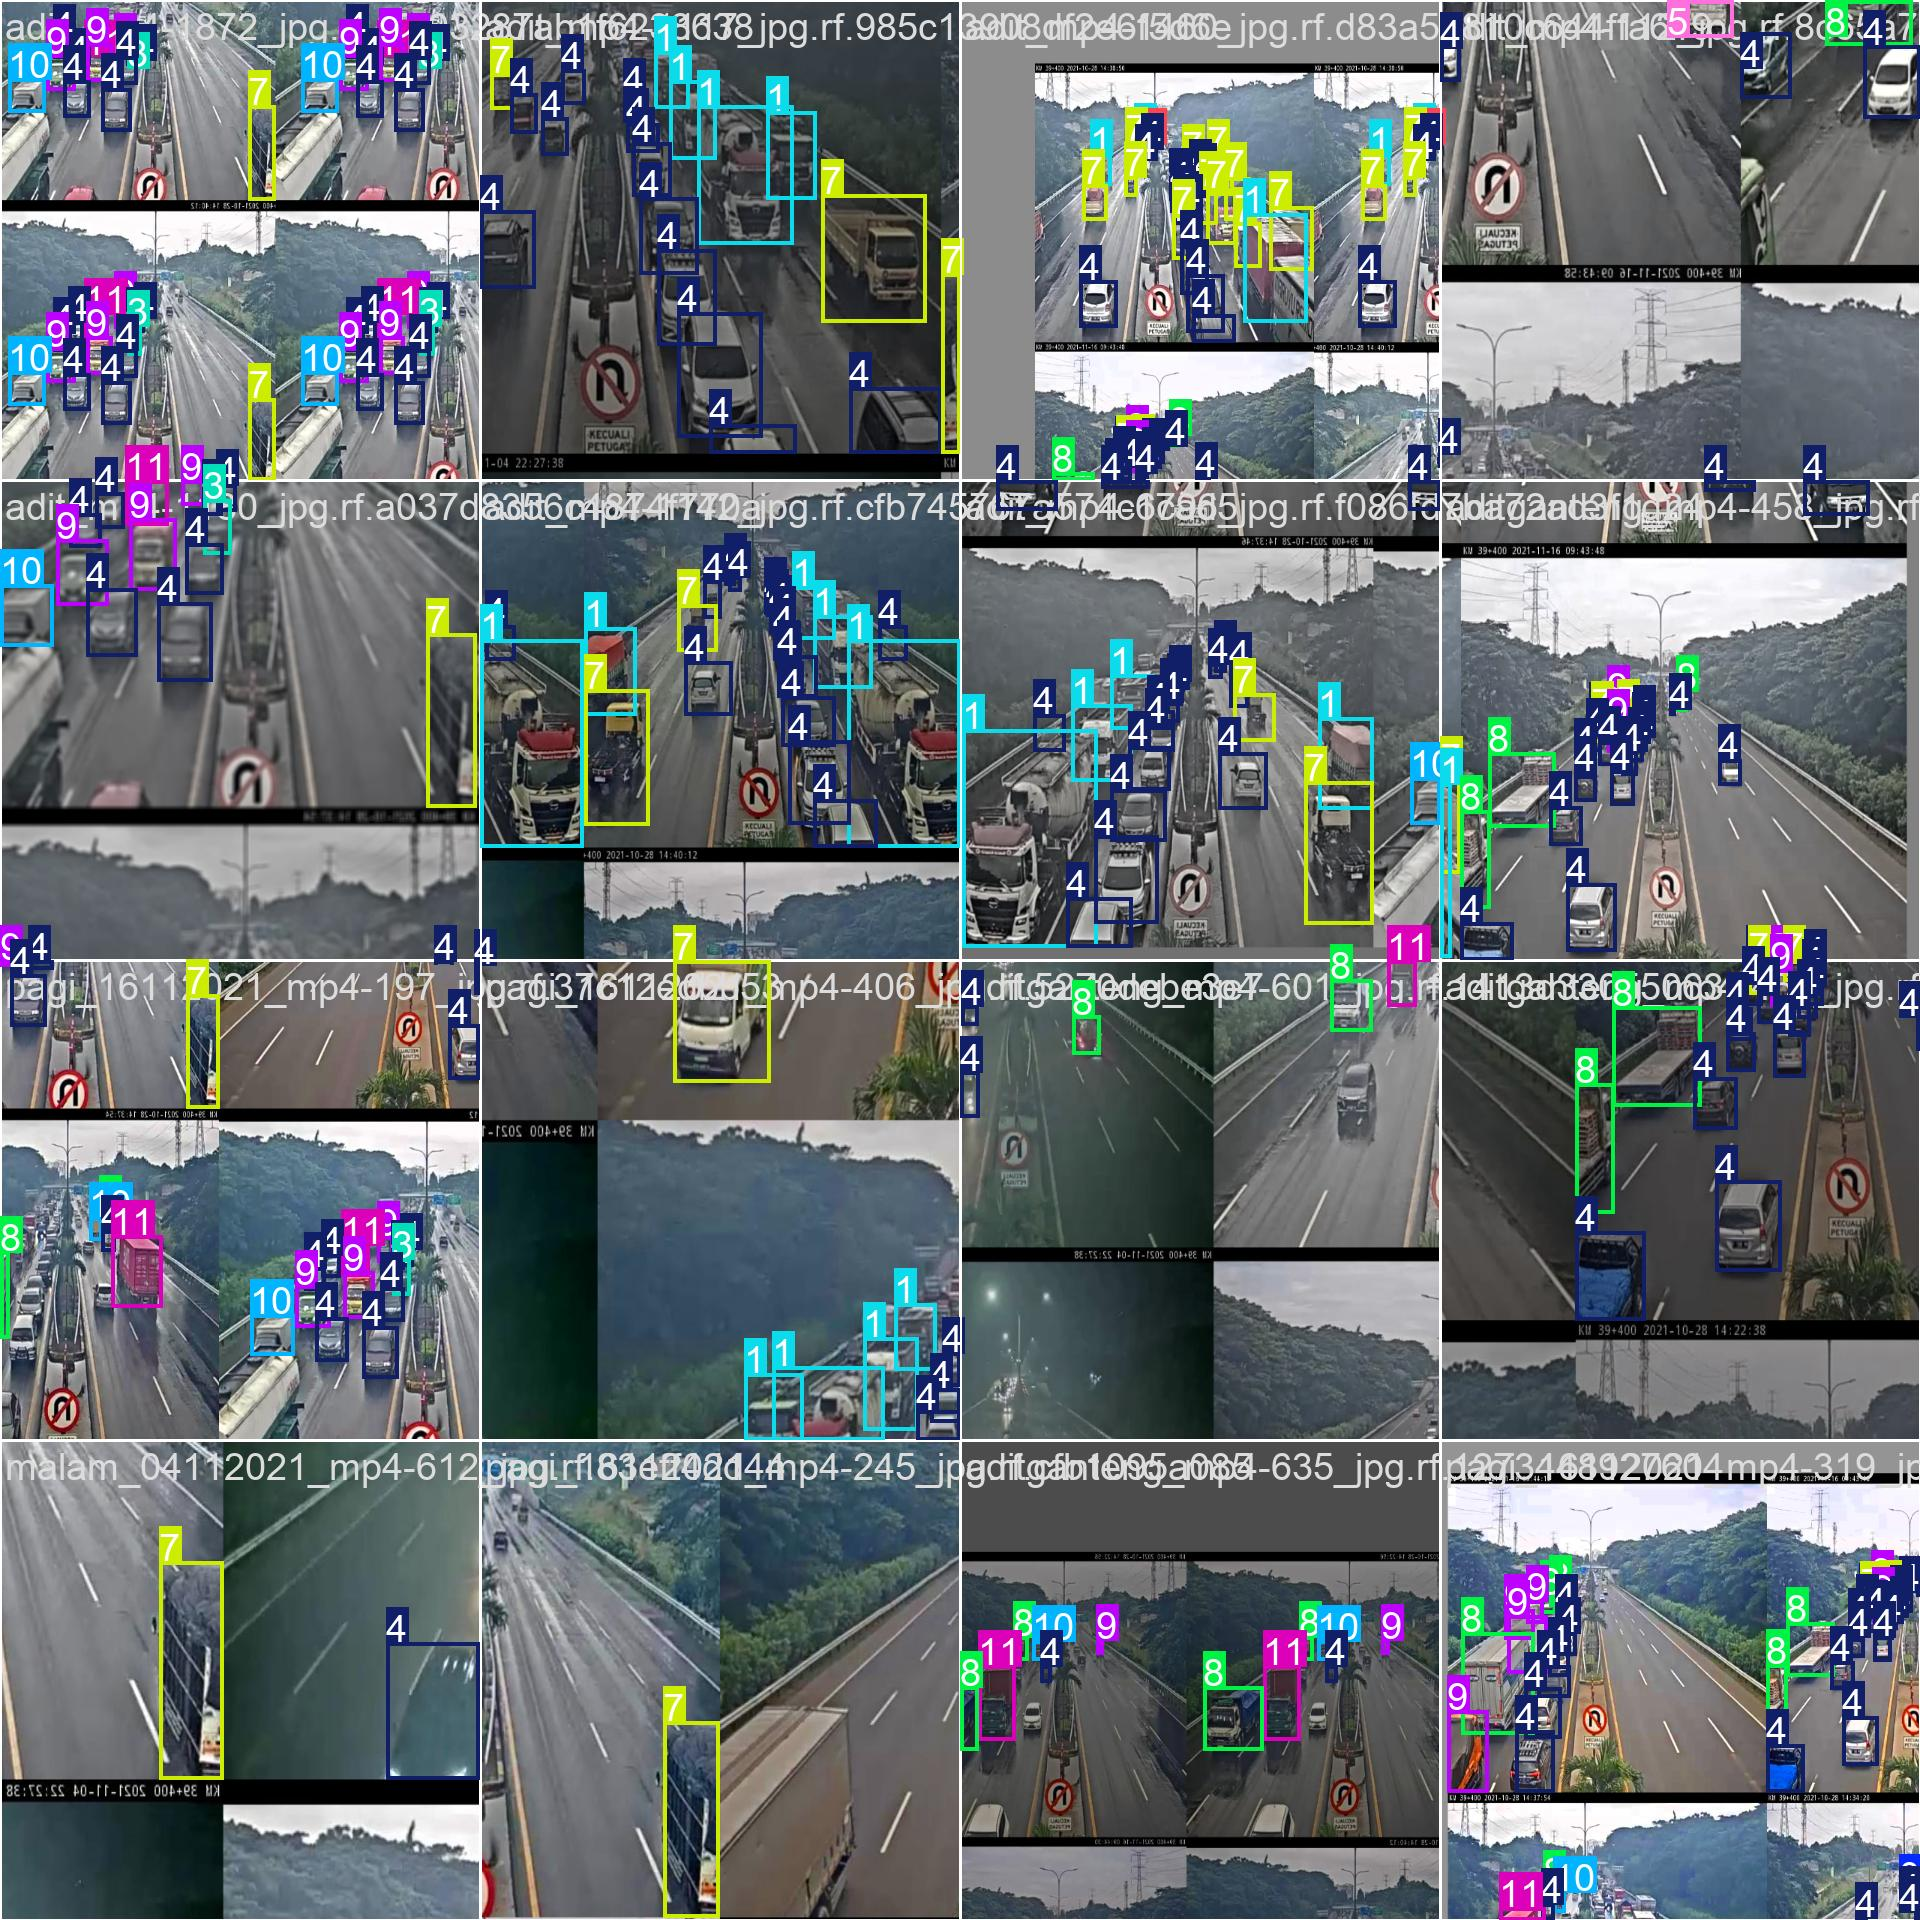

In [12]:
Image("/kaggle/working/runs/detect/train/train_batch0.jpg", width=600)

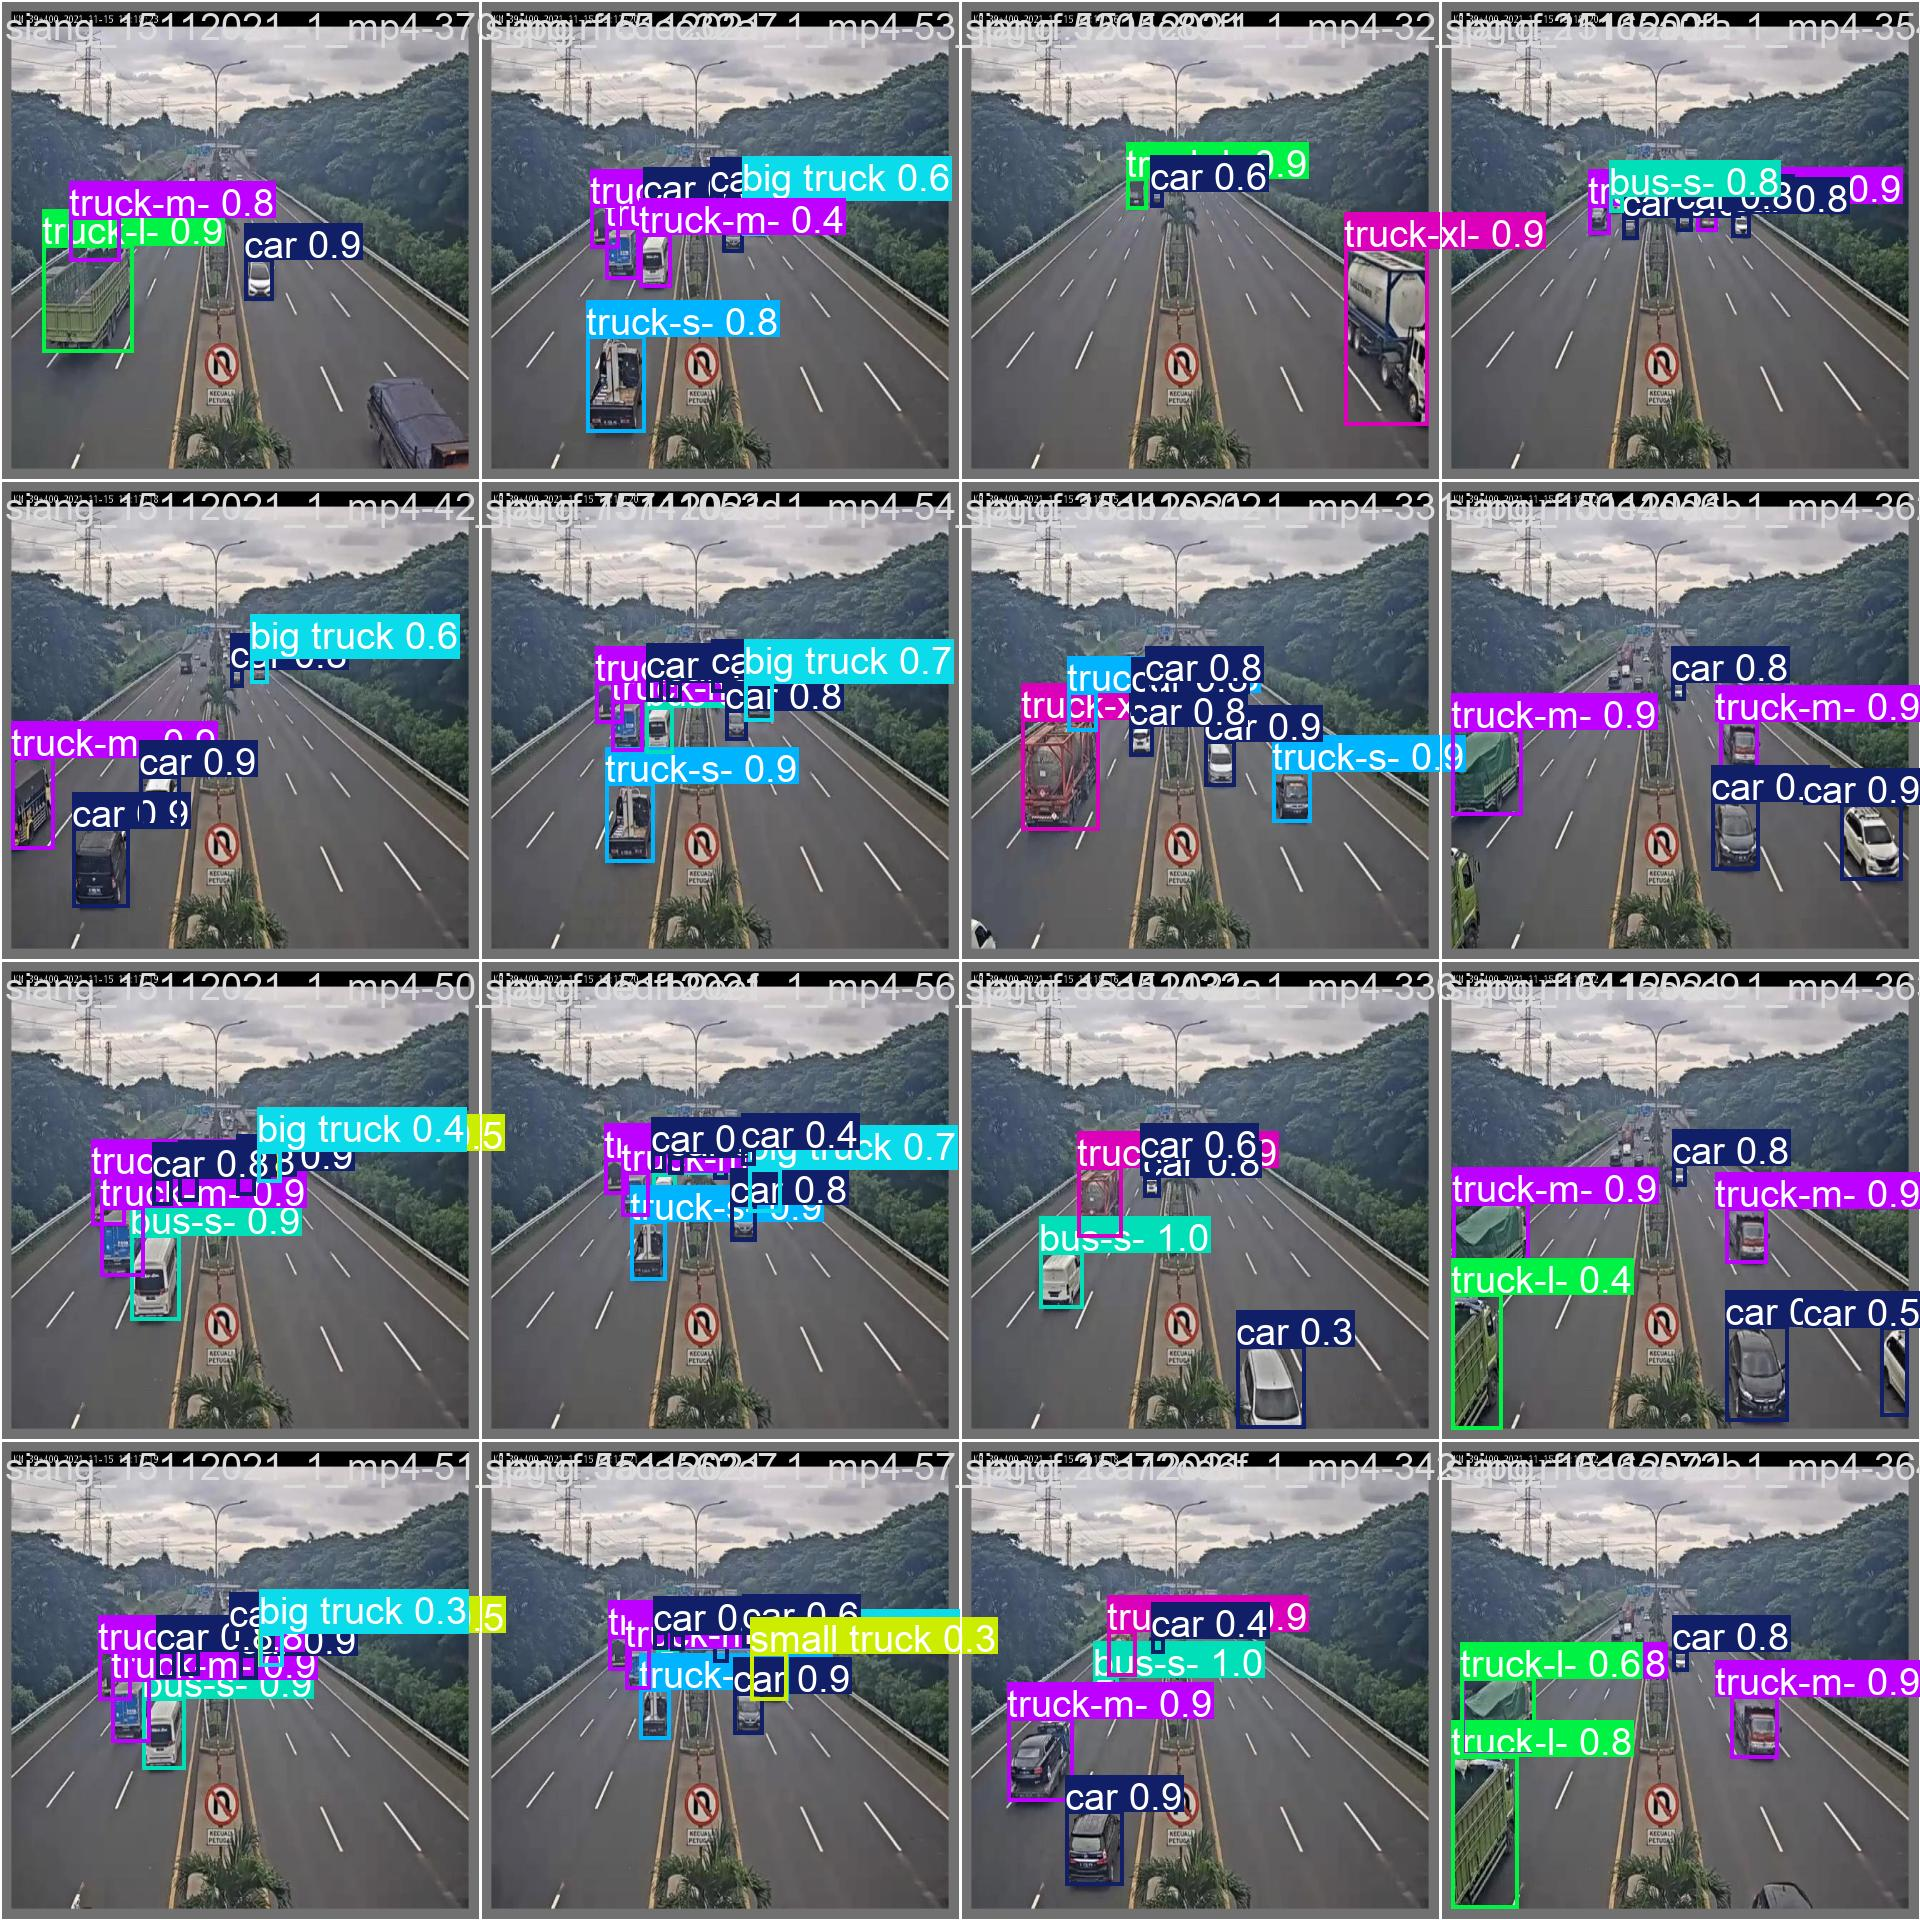

In [13]:
Image("/kaggle/working/runs/detect/train/val_batch0_pred.jpg", width=600)

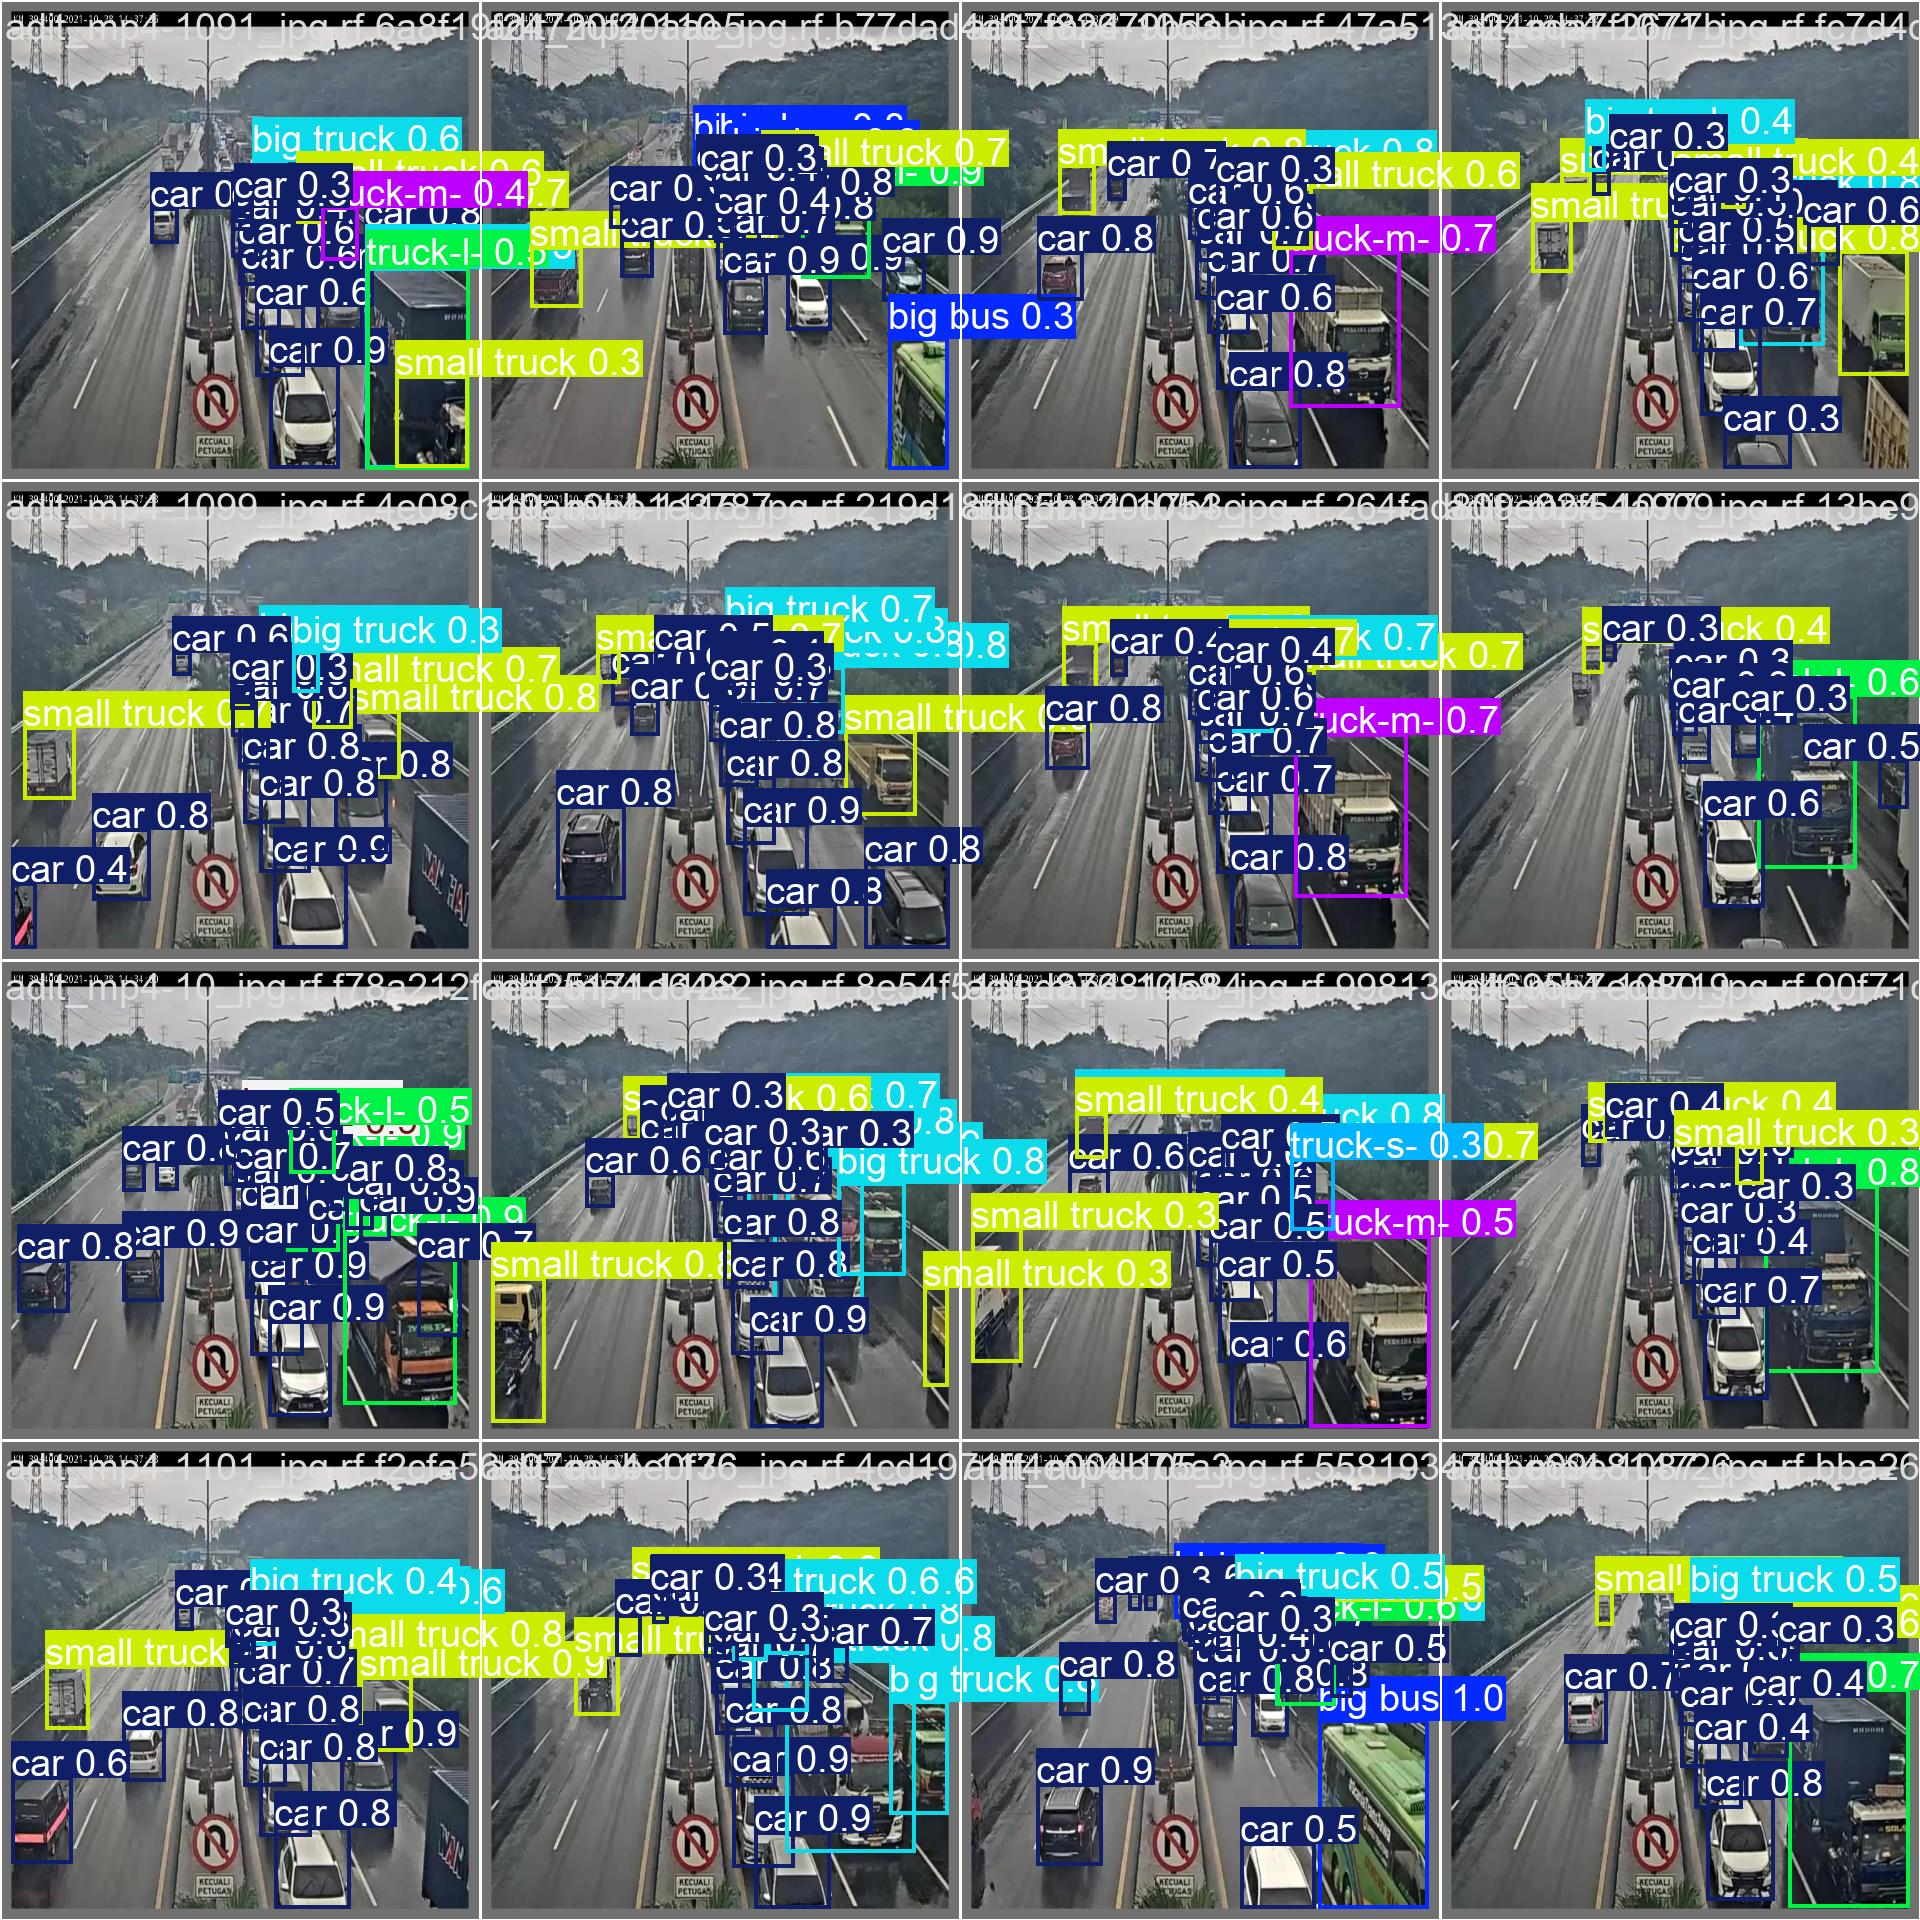

In [14]:
Image("/kaggle/working/runs/detect/train/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [15]:
!yolo task=detect mode=val model="/kaggle/working/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,584,492 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /kaggle/working/Venom-1/valid/labels.cache... 966 images, 3 backgr
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        966      13450      0.525      0.604      0.462      0.332
               big bus        210        273      0.847      0.427      0.704       0.53
             big truck        404       1162      0.843       0.43      0.633      0.426
                bus-l-          8          8     0.0658          1     0.0675     0.0374
                bus-s-         12         12      0.213      0.833      0.545       0.42
                   car        927       8537      0.887      0.711      0.827      0.532
             mid truck        118        257      0.841      0.436      0.452      0.354
             small bus         43         49      0.204  

**Step # 08 Inference with Custom Model on Images**

In [16]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.7 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,584,492 parameters, 0 gradients, 6.3 GFLOPs

image 1/458 /kaggle/working/Venom-1/test/images/adit_mp4-1002_jpg.rf.19a12e9f5bf107e52458e4ec3b8fcb92.jpg: 640x640 1 big truck, 10 cars, 1 truck-l-, 12.6ms
image 2/458 /kaggle/working/Venom-1/test/images/adit_mp4-1008_jpg.rf.9affafc28148e87e2d993097563bf7ad.jpg: 640x640 1 big truck, 9 cars, 2 truck-m-s, 1 truck-xl-, 9.6ms
image 3/458 /kaggle/working/Venom-1/test/images/adit_mp4-1022_jpg.rf.9315b5ca737e695e2bcc52ae6afd7fdc.jpg: 640x640 11 cars, 1 truck-m-, 8.6ms
image 4/458 /kaggle/working/Venom-1/test/images/adit_mp4-1028_jpg.rf.692db25a80569367ec697a7155d314c2.jpg: 640x640 12 cars, 2 small trucks, 1 truck-m-, 8.7ms
image 5/458 /kaggle/working/Venom-1/test/images/adit_mp4-1035_jpg.rf.d4161be78fb65160fc237d16a1328476.jpg: 640x640 1 big truck, 9 cars, 1 small truck, 8.6ms
image 6/458 /kaggle/working/Venom-1/test/images/adit_mp4-104

**Step # 08 Inference with Custom Model on Videos**

In [17]:
# !yolo task=detect mode=predict model= "/content/runs/detect/train/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True

In [18]:
!zip -r /kaggle/working/runs.zip /kaggle/working/runs


  adding: kaggle/working/runs/ (stored 0%)
  adding: kaggle/working/runs/detect/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/adit_mp4-1428_jpg.rf.44dddfba8f46cf5c7a61b26b445e194d.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/predict/adit_mp4-770_jpg.rf.ff6d92e7cb739b7597a1dd85c253e6b8.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/malam_04112021_mp4-411_jpg.rf.35403cafb7babb91ac3ecc6b533a8fa7.jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/adit_mp4-327_jpg.rf.f72ed615328721394b7561d62cd2f200.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/predict/adit_mp4-1028_jpg.rf.692db25a80569367ec697a7155d314c2.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/predict/adit_mp4-2056_jpg.rf.c8f1413fa6b8941e65c608a851ea764f.jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/adit_mp4-1164_jpg.rf.28d75b0403108e897237642d80157d41.jpg (deflated 3%)
  adding: kaggle/workin